In [1]:
% cd /content/drive/MyDrive/edureka!/Assignments/test-1

/content/drive/MyDrive/edureka!/Assignments/test-1


In [2]:
import tensorflow 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
img_width, img_height = 150,150  #width and height of the images
train_data_dir = "dataset/train"
validation_data_dir= "dataset/test"
nb_train_sample =40
nb_validation_samples =20
epochs =20
batch_size= 20

In [4]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first': 
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)

In [5]:
train_datagen=ImageDataGenerator ( rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)


test_datagen=ImageDataGenerator (rescale=1. /255)


train_generator =train_datagen.flow_from_directory(train_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary',classes=['with_mask','without_mask'])

validation_generator =test_datagen.flow_from_directory(validation_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary')

Found 816 images belonging to 2 classes.
Found 560 images belonging to 2 classes.


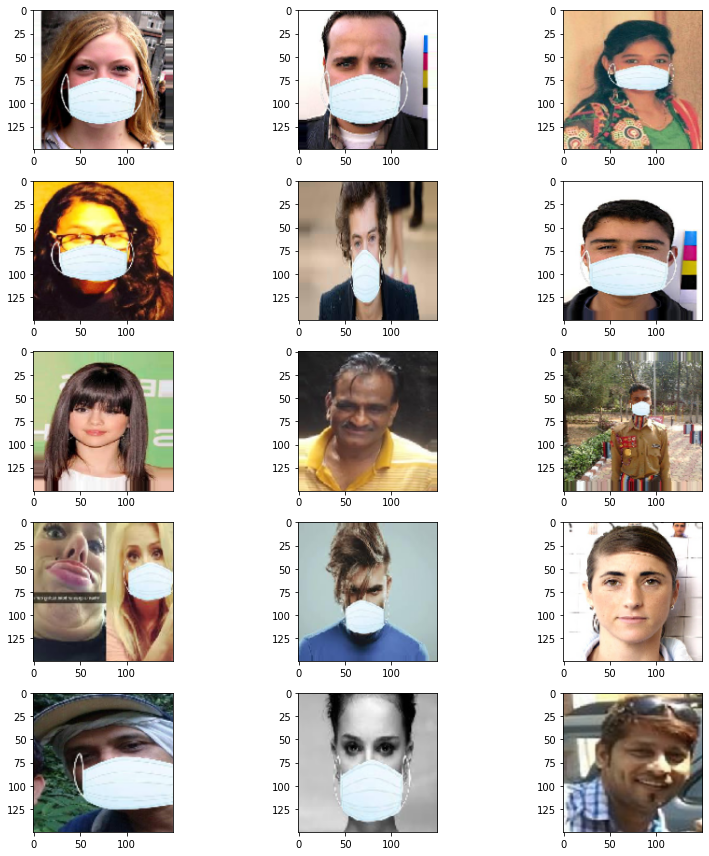

In [6]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [7]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=input_shape))


model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64)) 

model.add(Activation('relu'))
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 350464)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                22429760  
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [8]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 350464)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                22429760  
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [10]:
training = model.fit(train_generator,
                   steps_per_epoch=nb_train_sample,
                   epochs=10,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples)

Epoch 1/10
40/40 [==============================] - 178s 5s/step - loss: 0.4247 - accuracy: 0.8266 - val_loss: 0.2803 - val_accuracy: 0.8925
Epoch 2/10
40/40 [==============================] - 34s 878ms/step - loss: 0.3604 - accuracy: 0.8606 - val_loss: 0.2184 - val_accuracy: 0.9350
Epoch 3/10
40/40 [==============================] - 16s 409ms/step - loss: 0.2139 - accuracy: 0.9183 - val_loss: 0.1812 - val_accuracy: 0.9400
Epoch 4/10
40/40 [==============================] - 10s 257ms/step - loss: 0.2252 - accuracy: 0.9171 - val_loss: 0.1255 - val_accuracy: 0.9550
Epoch 5/10
40/40 [==============================] - 9s 218ms/step - loss: 0.2625 - accuracy: 0.9183 - val_loss: 0.0863 - val_accuracy: 0.9725
Epoch 6/10
40/40 [==============================] - 9s 217ms/step - loss: 0.2305 - accuracy: 0.9183 - val_loss: 0.0632 - val_accuracy: 0.9850
Epoch 7/10
40/40 [==============================] - 8s 209ms/step - loss: 0.1554 - accuracy: 0.9422 - val_loss: 0.4784 - val_accuracy: 0.8200
Epoc

In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path =  fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a without mask")
  else:
    print(fn + " is with mask")

Saving augmented_image_6.jpg to augmented_image_6.jpg
[0.]
augmented_image_6.jpg is with mask


In [18]:
import json
from keras.models import model_from_json
from keras.models import load_model
from keras.preprocessing import image
import numpy as np


model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)



model.save_weights('model.h5')
print("[INFO] Saved model to disk")

[INFO] Saved model to disk


In [1]:
import json
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
# load the model we saved
#model=load_model("kwhFinal.h5")
path = "dataset/train/with_mask/21-with-mask.jpg"
# predicting images
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

classes = loaded_model.predict(x)
if classes[0]>0.5:
    print(" is a without mask")
else:
    print(" is with mask")

img=mpimg.imread(path)
imgplot = plt.imshow(img)
plt.show()

In [ ]:
import cv2
import numpy as np

results={0:'without mask',1:'mask'}
GR_dict={0:(0,0,255),1:(0,255,0)}

rect_size = 4
cap = cv2.VideoCapture("mask.mp4") 


haarcascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

while True:
    (rval, im) = cap.read()
    im=cv2.flip(im,1,1) 

    
    rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    faces = haarcascade.detectMultiScale(rerect_size)
    for f in faces:
        (x, y, w, h) = [v * rect_size for v in f] 
        
        face_img = im[y:y+h, x:x+w]
        rerect_sized=cv2.resize(face_img,(150,150))
        normalized=rerect_sized/255.0
        reshaped=np.reshape(normalized,(1,150,150,3))
        reshaped = np.vstack([reshaped])
        result=loaded_model.predict(reshaped)

        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
        cv2.putText(im, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)

    cv2.imshow('LIVE',   im)
    key = cv2.waitKey(10)
    
    if key == 27: 
        break

cap.release()

cv2.destroyAllWindows()